In [85]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt

### Read the input file and check the data dimension

In [58]:
credit_df = pd.read_csv("german_credit.csv") 

In [59]:
credit_df.shape

(1000, 21)

In [60]:
credit_df.groupby('default').count()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
default,,,,,,,,,,,,,,,,,,,,
0,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300


In [61]:
credit_df.groupby('credit_history').count()

,default,account_check_status,duration_in_month,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
credit_history,,,,,,,,,,,,,,,,,,,,
all credits at this bank paid back duly,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
critical account/ other credits existing (not at this bank),293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293
delay in paying off in the past,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
existing credits paid back duly till now,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530
no credits taken/ all credits paid back duly,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40


In [62]:
credit_df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [63]:
credit_df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [65]:
X = credit_df.drop('default', axis=1)
y = credit_df[['default']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [66]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [67]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [68]:
X_train.shape

(500, 48)

In [69]:
X_test.shape

(500, 48)

In [70]:
X_train.dtypes

duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_critical account/ other credits existing (not at this bank)    uint8
credit_history_delay in paying off in the past                              

In [71]:
X_test.dtypes

duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_critical account/ other credits existing (not at this bank)    uint8
credit_history_delay in paying off in the past                              

In [72]:
# Print Shape of model data
credit_df.shape

(1000, 21)

### Check for highly correlated variables but don't required any treatment for this use case

In [73]:
linR = LinearRegression()
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [74]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [75]:
sfs1.get_metric_dict()

{1: {'feature_idx': (9,),
  'cv_scores': array([0.08642071, 0.03962363, 0.09933915, 0.09960609, 0.12028534]),
  'avg_score': 0.08905498541577539,
  'feature_names': ('9',),
  'ci_bound': 0.03469248949830252,
  'std_dev': 0.026991935447571575,
  'std_err': 0.013495967723785788},
 2: {'feature_idx': (2, 9),
  'cv_scores': array([0.10424683, 0.0563436 , 0.12346376, 0.11544053, 0.13477901]),
  'avg_score': 0.10685474763573213,
  'feature_names': ('2', '9'),
  'ci_bound': 0.0349046588734468,
  'std_dev': 0.027157010429524838,
  'std_err': 0.013578505214762419},
 3: {'feature_idx': (2, 4, 9),
  'cv_scores': array([0.11584256, 0.0840147 , 0.14437274, 0.13517636, 0.14035642]),
  'avg_score': 0.12395255635733304,
  'feature_names': ('2', '4', '9'),
  'ci_bound': 0.028583488953188324,
  'std_dev': 0.02223892548064574,
  'std_err': 0.011119462740322869},
 4: {'feature_idx': (1, 2, 4, 9),
  'cv_scores': array([0.1507706 , 0.11780607, 0.1434903 , 0.1355565 , 0.15872802]),
  'avg_score': 0.141270297

In [76]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 9, 15]


In [77]:
X_train.dtypes

duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_critical account/ other credits existing (not at this bank)    uint8
credit_history_delay in paying off in the past                              

In [78]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['credit_amount', 'installment_as_income_perc', 'age', 'account_check_status_no checking account', 'purpose_car (new)']


### Drop the original variables which are converted to dummy

In [79]:
credit_df= credit_df.drop('duration_in_month', axis=1)
credit_df= credit_df.drop('credit_history', axis=1)
credit_df= credit_df.drop('savings', axis=1)
credit_df= credit_df.drop('present_emp_since', axis=1)
credit_df= credit_df.drop('personal_status_sex', axis=1)
credit_df= credit_df.drop('other_debtors', axis=1)
credit_df= credit_df.drop('present_res_since', axis=1)
credit_df= credit_df.drop('property', axis=1)
credit_df= credit_df.drop('other_installment_plans', axis=1)
credit_df= credit_df.drop('housing', axis=1)
credit_df= credit_df.drop('credits_this_bank', axis=1)
credit_df= credit_df.drop('job', axis=1)
credit_df= credit_df.drop('people_under_maintenance', axis=1)
credit_df= credit_df.drop('telephone', axis=1)
credit_df= credit_df.drop('foreign_worker', axis=1)

In [80]:
credit_df.dtypes

default                        int64
account_check_status          object
purpose                       object
credit_amount                  int64
installment_as_income_perc     int64
age                            int64
dtype: object

In [81]:
credit_df = pd.get_dummies(credit_df, drop_first=True)

In [82]:
credit_df.dtypes

default                                                                    int64
credit_amount                                                              int64
installment_as_income_perc                                                 int64
age                                                                        int64
account_check_status_< 0 DM                                                uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year    uint8
account_check_status_no checking account                                   uint8
purpose_business                                                           uint8
purpose_car (new)                                                          uint8
purpose_car (used)                                                         uint8
purpose_domestic appliances                                                uint8
purpose_education                                                          uint8
purpose_furniture/equipment 

In [83]:
credit_df= credit_df.drop('account_check_status_< 0 DM', axis=1)
credit_df= credit_df.drop('account_check_status_>= 200 DM / salary assignments for at least 1 year', axis=1)
credit_df= credit_df.drop('purpose_business', axis=1)
credit_df= credit_df.drop('purpose_car (used)', axis=1)
credit_df= credit_df.drop('purpose_domestic appliances', axis=1)
credit_df= credit_df.drop('purpose_education', axis=1)
credit_df= credit_df.drop('purpose_furniture/equipment', axis=1)
credit_df= credit_df.drop('purpose_radio/television', axis=1)
credit_df= credit_df.drop('purpose_repairs', axis=1)
credit_df= credit_df.drop('purpose_retraining', axis=1)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [84]:
X = credit_df.drop('default', axis=1)
y = credit_df[['default']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [89]:
Rf_model = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion='entropy',max_depth=5,random_state=9999 )

In [90]:
Rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [91]:
y_predict_Rf=Rf_model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [92]:
Rf_cr=metrics.classification_report(y_test,y_predict_Rf)
print(Rf_cr)

             precision    recall  f1-score   support

          0       0.75      0.94      0.83       214
          1       0.59      0.22      0.32        86

avg / total       0.71      0.73      0.69       300



In [93]:
Rf_acc=metrics.accuracy_score(y_test,y_predict_Rf)
print(Rf_acc)

0.7333333333333333


In [95]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_predict_Rf)
print(conf_mat)

[[201  13]
 [ 67  19]]


### Q6 Show the list of the features importance( 1 Marks)

In [96]:
print (pd.Series(Rf_model.feature_importances_,index = list(X)).sort_values(ascending=False))

credit_amount                               0.344556
account_check_status_no checking account    0.290352
age                                         0.213374
installment_as_income_perc                  0.105237
purpose_car (new)                           0.046480
dtype: float64


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [99]:
# Use below values
num_folds = 10
seed = 77

In [7]:
#Validate the Random Forest model build above using k fold

In [97]:
X_std = StandardScaler().fit_transform(X)

In [100]:
n_estimators = range(1, seed)
results = []
scoring = 'accuracy'
for estimator in n_estimators:
    kfold = model_selection.KFold(n_splits=num_folds,random_state=2)
    cv_results = model_selection.cross_val_score(Rf_model, X_std, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (estimator, cv_results.mean(), cv_results.std())
    print(msg)

1: 0.725000 (0.047592)
2: 0.725000 (0.047592)
3: 0.725000 (0.047592)
4: 0.725000 (0.047592)
5: 0.725000 (0.047592)
6: 0.725000 (0.047592)
7: 0.725000 (0.047592)
8: 0.725000 (0.047592)
9: 0.725000 (0.047592)
10: 0.725000 (0.047592)
11: 0.725000 (0.047592)
12: 0.725000 (0.047592)
13: 0.725000 (0.047592)
14: 0.725000 (0.047592)
15: 0.725000 (0.047592)
16: 0.725000 (0.047592)
17: 0.725000 (0.047592)
18: 0.725000 (0.047592)
19: 0.725000 (0.047592)
20: 0.725000 (0.047592)
21: 0.725000 (0.047592)
22: 0.725000 (0.047592)
23: 0.725000 (0.047592)
24: 0.725000 (0.047592)
25: 0.725000 (0.047592)
26: 0.725000 (0.047592)
27: 0.725000 (0.047592)
28: 0.725000 (0.047592)
29: 0.725000 (0.047592)
30: 0.725000 (0.047592)
31: 0.725000 (0.047592)
32: 0.725000 (0.047592)
33: 0.725000 (0.047592)
34: 0.725000 (0.047592)
35: 0.725000 (0.047592)
36: 0.725000 (0.047592)
37: 0.725000 (0.047592)
38: 0.725000 (0.047592)
39: 0.725000 (0.047592)
40: 0.725000 (0.047592)
41: 0.725000 (0.047592)
42: 0.725000 (0.047592)
4

# Q8 Print the confusion matrix( 1 Marks)

In [101]:
conf_mat = confusion_matrix(y_test,y_predict_Rf)
print(conf_mat)

[[201  13]
 [ 67  19]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [102]:
Rf_cr=metrics.classification_report(y_test,y_predict_Rf)
print(Rf_cr)

             precision    recall  f1-score   support

          0       0.75      0.94      0.83       214
          1       0.59      0.22      0.32        86

avg / total       0.71      0.73      0.69       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [103]:
#Hint: Use roc_curve

In [105]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predict_Rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5800912845033689

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [106]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5800912845033689

Area Under the curve [0.         0.22093023 1.        ]


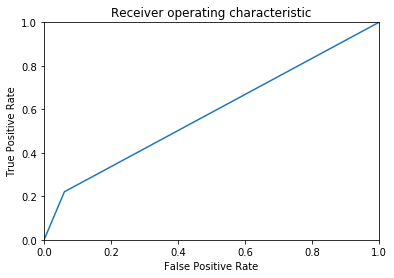

In [107]:
print('Area Under the curve',true_positive_rate)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [108]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
n_estimators = range(1, bootstrap_iteration)
scoring = 'accuracy'
for estimator in n_estimators:
    kfold = model_selection.KFold(n_splits=num_folds,random_state=2)
    cv_results = model_selection.cross_val_score(Rf_model, X_std, y, cv=kfold, scoring=scoring)
    accuracy.append(cv_results)
    msg = "%s: %f (%f)" % (estimator, cv_results.mean(), cv_results.std())
    print(msg)

1: 0.725000 (0.047592)
2: 0.725000 (0.047592)
3: 0.725000 (0.047592)
4: 0.725000 (0.047592)
5: 0.725000 (0.047592)
6: 0.725000 (0.047592)
